# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers

In [4]:
df = pd.read_csv('../concrete_data/compresive_strength_concrete.csv')

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
df.shape

(1030, 9)

In [10]:
data = df.iloc[:,:8]
targets = df.iloc[:,-1]

In [11]:
data.shape

(1030, 8)

In [12]:
targets.shape

(1030,)

In [13]:
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [14]:
targets_mean = targets.mean(axis=0)
targets -= targets_mean
targets_std = targets.std(axis=0)
targets /= targets_std

In [15]:
x_train = data.sample(frac=0.7,random_state=1)
x_test = data.sample(frac=0.3,random_state=1)
y_train = targets.sample(frac=0.7,random_state=1)
y_test = targets.sample(frac=0.3,random_state=1)

In [16]:
x_train=np.asarray(x_train).astype("float32")
x_test=np.asarray(x_test).astype("float32")

In [17]:
# validation Data split from training Data
val_x=x_train[:50]
partial_x_train=x_train[50:]
val_y=y_train[:50]
partial_y_train=y_train[50:]

In [19]:
model = models.Sequential()
model.add(layers.Dense(10,activation="relu" ,input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
________________________________________________________

In [21]:
history = model.fit(partial_x_train, partial_y_train,epochs=100, batch_size=5, verbose=1,validation_data=(val_x,val_y))

Train on 671 samples, validate on 50 samples
Epoch 1/100
671/671 [==============================] - 0s 638us/sample - loss: 1.0328 - mean_absolute_error: 0.8147 - val_loss: 0.6986 - val_mean_absolute_error: 0.6766
Epoch 2/100
671/671 [==============================] - 0s 679us/sample - loss: 1.0097 - mean_absolute_error: 0.8023 - val_loss: 0.6918 - val_mean_absolute_error: 0.6693
Epoch 3/100
671/671 [==============================] - 0s 360us/sample - loss: 1.0014 - mean_absolute_error: 0.7996 - val_loss: 0.6811 - val_mean_absolute_error: 0.6623
Epoch 4/100
671/671 [==============================] - 0s 288us/sample - loss: 0.9770 - mean_absolute_error: 0.7911 - val_loss: 0.6548 - val_mean_absolute_error: 0.6550
Epoch 5/100
671/671 [==============================] - 0s 286us/sample - loss: 0.9209 - mean_absolute_error: 0.7720 - val_loss: 0.6212 - val_mean_absolute_error: 0.6482
Epoch 6/100
671/671 [==============================] - 0s 276us/sample - loss: 0.8487 - mean_absolute_error: 0

Epoch 49/100
671/671 [==============================] - 0s 322us/sample - loss: 0.3450 - mean_absolute_error: 0.4442 - val_loss: 0.2119 - val_mean_absolute_error: 0.3669
Epoch 50/100
671/671 [==============================] - ETA: 0s - loss: 0.3255 - mean_absolute_error: 0.437 - 0s 274us/sample - loss: 0.3293 - mean_absolute_error: 0.4399 - val_loss: 0.2197 - val_mean_absolute_error: 0.3719
Epoch 51/100
671/671 [==============================] - 0s 298us/sample - loss: 0.3359 - mean_absolute_error: 0.4395 - val_loss: 0.2180 - val_mean_absolute_error: 0.3735
Epoch 52/100
671/671 [==============================] - 0s 274us/sample - loss: 0.3661 - mean_absolute_error: 0.4563 - val_loss: 0.2147 - val_mean_absolute_error: 0.3749
Epoch 53/100
671/671 [==============================] - 0s 276us/sample - loss: 0.3138 - mean_absolute_error: 0.4348 - val_loss: 0.2106 - val_mean_absolute_error: 0.3709
Epoch 54/100
671/671 [==============================] - 0s 278us/sample - loss: 0.3028 - mean_ab

Epoch 97/100
671/671 [==============================] - 0s 277us/sample - loss: 0.2779 - mean_absolute_error: 0.3867 - val_loss: 0.1823 - val_mean_absolute_error: 0.3464
Epoch 98/100
671/671 [==============================] - 0s 285us/sample - loss: 0.2911 - mean_absolute_error: 0.3931 - val_loss: 0.1847 - val_mean_absolute_error: 0.3533
Epoch 99/100
671/671 [==============================] - 0s 295us/sample - loss: 0.2477 - mean_absolute_error: 0.3747 - val_loss: 0.1850 - val_mean_absolute_error: 0.3570
Epoch 100/100
671/671 [==============================] - 0s 277us/sample - loss: 0.2488 - mean_absolute_error: 0.3778 - val_loss: 0.1919 - val_mean_absolute_error: 0.3635


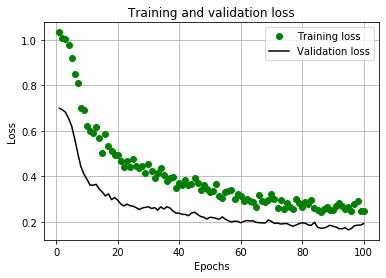

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'black', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [23]:
model.evaluate(x_test, y_test)

309/309 [==============================] - 0s 52us/sample - loss: 0.2319 - mean_absolute_error: 0.3874


[0.23189138850155, 0.38741258]

In [24]:
pred = model.predict(x_test)
pred

array([[-0.55630827],
       [-0.8605277 ],
       [-0.41005832],
       [-0.78800917],
       [-0.17169939],
       [ 1.2530972 ],
       [-0.6184278 ],
       [ 0.22809835],
       [ 0.19627647],
       [-0.32380337],
       [ 1.4679317 ],
       [-0.826189  ],
       [ 0.10606548],
       [-0.30751324],
       [-0.9453519 ],
       [-0.3130523 ],
       [ 0.38707578],
       [ 1.1776916 ],
       [ 1.2152927 ],
       [-0.3228929 ],
       [-0.63756424],
       [ 0.63521147],
       [-0.6400191 ],
       [ 1.1118386 ],
       [ 1.4173993 ],
       [-0.04278795],
       [-0.14507337],
       [-0.23044561],
       [-0.08852132],
       [-0.81965405],
       [ 0.48103303],
       [ 1.1976146 ],
       [-0.31627822],
       [-0.18693097],
       [ 0.35695943],
       [-0.06405558],
       [-0.6926262 ],
       [-0.25926304],
       [-0.2794392 ],
       [-0.7353662 ],
       [ 0.32967088],
       [-0.6597485 ],
       [ 0.7891466 ],
       [-0.06957646],
       [-0.2887615 ],
       [-0

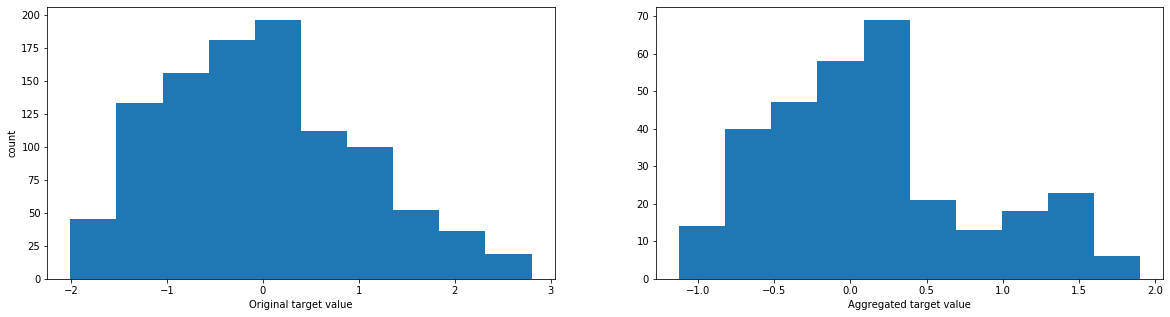

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(targets)
plt.xlabel('Original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('Aggregated target value')
plt.show()